In [1]:
import pickle
import os
import numpy as np

with open('user_item_rating_matrix.pkl','rb')as f:
    user_item_rating_matrix=pickle.load(f)

user_item_rating_matrix=np.transpose(user_item_rating_matrix)

In [2]:
split_matrix=np.array_split(user_item_rating_matrix,5)
print(len(split_matrix))

5


In [3]:

import math

def cosine_similarity(v1, v2):
    dot_product = sum([x*y for x,y in zip(v1, v2)])
    vec_1 = math.sqrt(sum([x*x for x in v1]))
    vec_2 = math.sqrt(sum([y*y for y in v2]))

    if (vec_1 == 0 or vec_2 == 0):
        return 0
    
    return dot_product / (vec_1 * vec_2)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity



similarity_matrix=np.zeros((user_item_rating_matrix.shape[0],user_item_rating_matrix.shape[0]))
average_rating_user=np.zeros(user_item_rating_matrix.shape[0])



for i in range(user_item_rating_matrix.shape[0]):
    tot_sum=sum(user_item_rating_matrix[i])
    average_rating_user[i]=tot_sum/(user_item_rating_matrix.shape[1]-np.count_nonzero(user_item_rating_matrix[0]==0))

similarity_matrix=cosine_similarity(user_item_rating_matrix)

# for i in range(user_item_rating_matrix.shape[0]):
#     curr=[]
#     for j in range(i+1,user_item_rating_matrix.shape[0]):
#         u1=user_item_rating_matrix[i]
#         u2=user_item_rating_matrix[j]
#         simi=cosine_similarity(u1,u2)
#         similarity_matrix[i][j]=simi
#         similarity_matrix[j][i]=simi



In [7]:
pickle.dump(similarity_matrix,open('similarity_matrixk_fold.pkl','wb'))

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix=cosine_similarity(user_item_rating_matrix)

In [12]:
def top_n_similar_users(similarity_matrix, N):
    user=len(similarity_matrix)
    user_top_neighbours=[]
    for u1 in range(user):
        curr = []
        for u2 in range(user):
            if(u1==u2):
                continue
            curr.append([u2,similarity_matrix[u2,u1]])
            
        curr = sorted(curr,key=lambda l:l[1], reverse=True)
        user_top_neighbours.append(curr)
    return user_top_neighbours
N=10
top_n_users = top_n_similar_users(similarity_matrix, N)

In [16]:
print(similarity_matrix[9][9])

0.9999999999999998


In [21]:
print(top_n_users[66])

[[427, 0.05447230728267944], [0, 0.0], [1, 0.0], [2, 0.0], [3, 0.0], [4, 0.0], [5, 0.0], [6, 0.0], [7, 0.0], [8, 0.0], [9, 0.0], [10, 0.0], [11, 0.0], [12, 0.0], [13, 0.0], [14, 0.0], [15, 0.0], [16, 0.0], [17, 0.0], [18, 0.0], [19, 0.0], [20, 0.0], [21, 0.0], [22, 0.0], [23, 0.0], [24, 0.0], [25, 0.0], [26, 0.0], [27, 0.0], [28, 0.0], [29, 0.0], [30, 0.0], [31, 0.0], [32, 0.0], [33, 0.0], [34, 0.0], [35, 0.0], [36, 0.0], [37, 0.0], [38, 0.0], [39, 0.0], [40, 0.0], [41, 0.0], [42, 0.0], [43, 0.0], [44, 0.0], [45, 0.0], [46, 0.0], [47, 0.0], [48, 0.0], [49, 0.0], [50, 0.0], [51, 0.0], [52, 0.0], [53, 0.0], [54, 0.0], [55, 0.0], [56, 0.0], [57, 0.0], [58, 0.0], [59, 0.0], [60, 0.0], [61, 0.0], [62, 0.0], [63, 0.0], [64, 0.0], [65, 0.0], [67, 0.0], [68, 0.0], [69, 0.0], [70, 0.0], [71, 0.0], [72, 0.0], [73, 0.0], [74, 0.0], [75, 0.0], [76, 0.0], [77, 0.0], [78, 0.0], [79, 0.0], [80, 0.0], [81, 0.0], [82, 0.0], [83, 0.0], [84, 0.0], [85, 0.0], [86, 0.0], [87, 0.0], [88, 0.0], [89, 0.0], [9

In [23]:
id_offset=0
leno=5
for i in range (leno):
    print(f"For cross val set {i}")
    if i!=0:
        id_offset+=len(split_matrix[i-1])
        print(id_offset)
        
    for K in [10,20,30,40,50]:
        print(f"for K={K}")
        totalerror = 0
        testsetlen = len(split_matrix[i])
        user_1_test=split_matrix[i]
        user_top_neighbours=top_n_users
        for bruh in range(len(user_1_test)):

            user_1_id = id_offset+bruh
            target=average_rating_user[user_1_id]
            score = 0
            tot_sim = 0

            top_n = user_top_neighbours[user_1_id][:K]

            
            for similar,similarityy in top_n:

                score+=average_rating_user[similar]
            score=score/K
                    
            

            totalerror += abs(target - score)
        mae = float(totalerror)/testsetlen
        print (f"MAE = {mae}")
        

            



For cross val set 0
for K=10
MAE = 2.0581256771397616
for K=20
MAE = 1.410866738894908
for K=30
MAE = 1.173889490790899
for K=40
MAE = 1.809964788732394
for K=50
MAE = 1.7961917659804982
For cross val set 1
142
for K=10
MAE = 1.8526977248104013
for K=20
MAE = 1.1914734561213443
for K=30
MAE = 0.903781148429036
for K=40
MAE = 1.4460522751895992
for K=50
MAE = 1.5353683640303357
For cross val set 2
284
for K=10
MAE = 1.626625135427954
for K=20
MAE = 1.0573266522210187
for K=30
MAE = 0.8147851209823046
for K=40
MAE = 1.363292253521127
for K=50
MAE = 1.4810335861321775
For cross val set 3
426
for K=10
MAE = 1.3008613217768157
for K=20
MAE = 0.8252302275189604
for K=30
MAE = 0.6306735283495849
for K=40
MAE = 1.323090465872155
for K=50
MAE = 1.3353531960996745
For cross val set 4
568
for K=10
MAE = 1.5568248772504099
for K=20
MAE = 0.9769121658483364
for K=30
MAE = 0.7856173849790865
for K=40
MAE = 1.4796658483360612
for K=50
MAE = 1.532222585924713


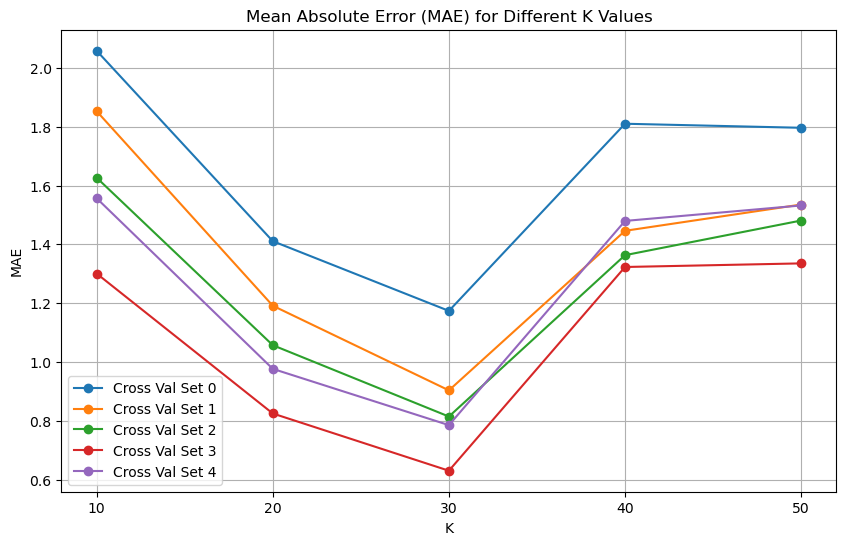

In [24]:
import matplotlib.pyplot as plt

# Data
K_values = [10, 20, 30, 40, 50]
cross_val_sets = range(5)

MAE_values = [
    [2.0581256771397616, 1.410866738894908, 1.173889490790899, 1.809964788732394, 1.7961917659804982],
    [1.8526977248104013, 1.1914734561213443, 0.903781148429036, 1.4460522751895992, 1.5353683640303357],
    [1.626625135427954, 1.0573266522210187, 0.8147851209823046, 1.363292253521127, 1.4810335861321775],
    [1.3008613217768157, 0.8252302275189604, 0.6306735283495849, 1.323090465872155, 1.3353531960996745],
    [1.5568248772504099, 0.9769121658483364, 0.7856173849790865, 1.4796658483360612, 1.532222585924713]
]

# Plotting
plt.figure(figsize=(10, 6))

for i, mae_values in enumerate(MAE_values):
    plt.plot(K_values, mae_values, marker='o', label=f'Cross Val Set {i}')

plt.title('Mean Absolute Error (MAE) for Different K Values')
plt.xlabel('K')
plt.ylabel('MAE')
plt.xticks(K_values)
plt.legend()
plt.grid(True)
plt.show()
